In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import b_value_functions1 as b_value_functions # these are the functions in the .py file 
from datetime import datetime

In [2]:
# Read in the example catalog 
catalog = pd.read_csv("D:\Yihe\Louis_CorinthData\OtherEQCatalogs\SOULTZ_19932000Best_agreement_induced\SSFS1995 formatted csv.csv")


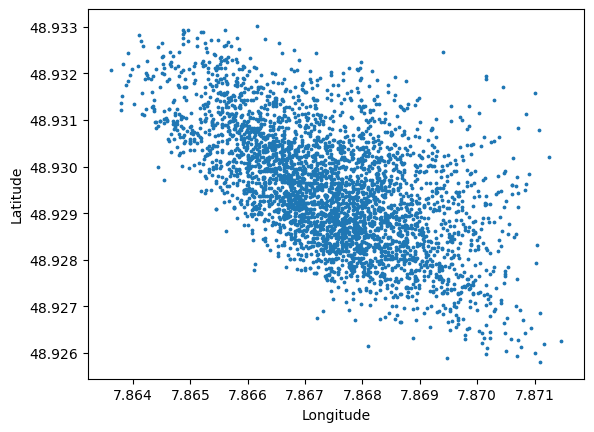

In [3]:
plt.scatter(catalog["Longitude (degree)"],catalog["Latitude (degree)"],s=3)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [4]:
# Inj End 1995-06-28 16:08:00
# Inj St 14/06/1995 19:58
injSt = datetime(1995,6,14,19,58).timestamp()/86400.0
injEnd=datetime(1995,6,28,16,8).timestamp()/86400.0-injSt

In [5]:
DT =[]
dt=[]
for i in range(len(catalog["Day"])):
    dayt = catalog["Day"][i].split("/")
    timt = catalog["Time"][i].split(":")
    DT.append(datetime(int(dayt[2]),int(dayt[1]),int(dayt[0]),int(timt[0]),int(timt[1]),int(timt[2])))
    dt.append(datetime(int(dayt[2]),int(dayt[1]),int(dayt[0]),int(timt[0]),int(timt[1]),int(timt[2])).timestamp()/86400.0-injSt)

In [6]:
# Filters all arrays according to injection start and end dates, chatgpt assisted
dtF, magF, xf, yf, depf,  = zip(*[
    (d, m, x, y, dp)
    for d, m, x, y, dp in zip(dt, catalog['M.magnit'], catalog['East (m)'], catalog['North (m)'], catalog['Depth (m)'])
    if injSt-injSt <= d <= injEnd
])
print(len(magF),len(DT))

3470 3636


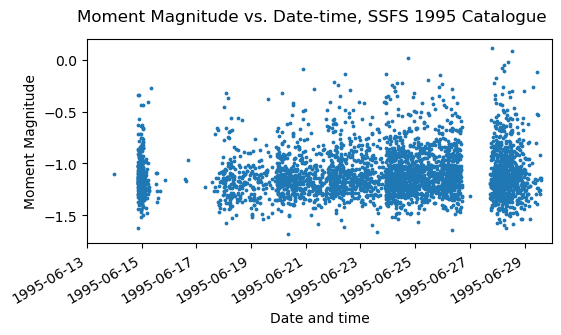

In [5]:
figure = plt.figure(figsize = [6,3])
ax1 = figure.add_subplot(111)
ax1.scatter(DT,catalog["M.magnit"],s=3)
figure.suptitle("Moment Magnitude vs. Date-time, SSFS 1995 Catalogue")
ax1.set_xlabel("Date and time")
ax1.set_ylabel("Moment Magnitude")
ax1.set_xlim([datetime(1995,6,13),datetime(1995,6,30)])
figure.autofmt_xdate()
plt.show()

In [7]:
import statistics
xref = statistics.median(xf[0:10])
yref = statistics.median(yf[0:10])
zref = statistics.median(depf[0:10])
print(xref,yref,zref)

85.5 -505.5 3188.0


In [8]:
dist = np.sqrt((np.array(xf)-xref)**2+(np.array(yf)-yref)**2+(np.array(depf)-zref)**2)

In [9]:
# create referential list to sort dist
dstc = dist.copy()
dstRef=[]
for i in range(len(dstc)):
    dstRef.append(i)

In [10]:
# Drif Recalculation
#%% correction  mag for Soultz 93, 95, 96

#M0 = 10.^(1.72*mag0+11.04);
#mag0=(2/3)*log10(M0)-6.1; 
M0  = np.power(10,1.72*np.array(magF)+11.04)
MN = 2/3.0*np.log10(M0)-6.1

In [10]:
stDat= DT[0]
DTNew = [(dt-stDat).total_seconds()/86400.0 for dt in DT]

# inj End: 13.82207175925926

In [11]:
MWN=[]
DTN=[]
dstN=[]
for i in range(len(DTNew)):
    if DTNew[i]< 13.82207175925926:
        MWN.append(MN[i])
        DTN.append(DTNew[i])
        dstN.append(dist[i])

2006-12-03 18:57:03


In [11]:
# bin stuff
bins = np.arange(-2, 6, 0.1)
mid_bins = (bins[:-1] + bins[1:])/2

In [12]:
def quicksort_with_swaps(arr1, arr2, low, high):
    if low < high:
        # Partition the arrays and get the pivot index
        pivot_index = partition(arr1, arr2, low, high)

        # Recursively sort the subarrays on both arrays
        quicksort_with_swaps(arr1, arr2, low, pivot_index)
        quicksort_with_swaps(arr1, arr2, pivot_index + 1, high)

def partition(arr1, arr2, low, high):
    # Choose the pivot as the middle element
    pivot = arr1[(low + high) // 2]
    i = low - 1
    j = high + 1

    while True:
        i += 1
        while arr1[i] < pivot:
            i += 1

        j -= 1
        while arr1[j] > pivot:
            j -= 1

        if i >= j:
            return j

        # Swap elements in both arrays
        arr1[i], arr1[j] = arr1[j], arr1[i]
        arr2[i], arr2[j] = arr2[j], arr2[i]

# Example usage:
array1 = [3, 1, 4, 1, 5, 9, 2, 6]
array2 = ['c', 'a', 'd', 'a', 'e', 'i', 'b', 'f']

quicksort_with_swaps(array1, array2, 0, len(array1) - 1)

print("Sorted array1:", array1)
print("Corresponding sorted array2:", array2)

def quicksort(arr):
    if len(arr) <= 1:
        return arr
    
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    
    return quicksort(left) + middle + quicksort(right)

Sorted array1: [1, 1, 2, 3, 4, 5, 6, 9]
Corresponding sorted array2: ['a', 'a', 'b', 'c', 'd', 'e', 'f', 'i']


In [14]:
Mw = np.copy(catalog['M.magnit'])
print(len(MWN))

3471


In [17]:
print(DT[0],DT[-1])

1995-06-14 20:24:13 1995-06-29 14:13:00


In [15]:
#dist = np.sqrt((np.array(X)-xref)**2+(np.array(Y)-yref)**2+(np.array(Z)-zref)**2)
print(len(dist))

3470


In [13]:
# Sort array based on 90th percentile mimicking method from Danre et al 2022
# find 90th percentile and above for every 50 events, build 4 array (percentile and non percentile)
percM =[]
percT =[]
percD=[]
rstM =[]
rstT =[]
rstD =[]

DTN = np.array(dtF)

for z in range(50,len(DTN)-50,50):
    #print(i,len(catalog["Time"]))
    #print(z)
    subDist=np.array(dist[z-50:z].copy())
    subTime=np.array(DTN[z-50:z].copy())
    subDstRef=[x for x in range(z-50,z)]
    quicksort_with_swaps(subDist, subDstRef, 0, len(subDist)-1)
    
    pM=[]
    pT=[]
    pD=[]
    rM=[]
    rT=[]
    rD=[]
    for y in range(50):
        if y<45:
            rM.append(MN[subDstRef[y]])
            rT.append(DTN[subDstRef[y]])
            rstD.append(dist[subDstRef[y]])
        if y>=45:
            pM.append(MN[subDstRef[y]])
            pT.append(DTN[subDstRef[y]])
            pD.append(dist[subDstRef[y]])
    percM += pM
    percT += pT
    percD += pD
    rstM += rM
    rstT += rT
    rstD += rD

In [14]:
print(len(rstM))

3060


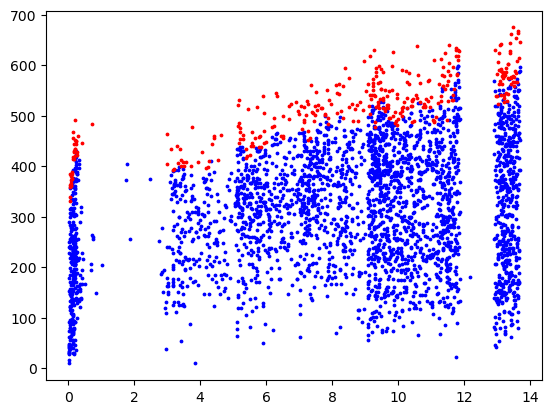

In [16]:
plt.scatter(rstT,rstD,c='b',s=3)
plt.scatter(percT,percD,c='r',s=3)

plt.show()

In [17]:
pbp=[]
plbp=[]
phbp=[]
pstdp=[]
pb=[]
plb=[]
phb=[]
pstd=[]
pdtr=[]

quicksort_with_swaps(percT,percM,0,len(percT)-1)
for i in range(300,len(percM),30):
    print(i)
    mxt=[]
    md=0
    for x in range(i-300,i):
        mxt.append(percM[x])
    mxT=np.array(mxt)
    b, Mc, hist = b_value_functions.btrad(mxT, bins, delta_b = 0.01)
    hist1, bP = b_value_functions.bpos(mxT)
    low_b, high_b, std = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.00001)    
    low_bp, high_bp, stdp = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.00001)
    pb.append(b)
    pdtr.append(percT[i])
    pbp.append(bP)
    plb.append(low_b)
    plbp.append(low_bp)
    phb.append(high_b)
    phbp.append(high_bp)
    pstd.append(std)
    pstdp.append(stdp)

300
330


In [18]:
rbp=[]
rlbp=[]
rhbp=[]
rstdp=[]
rb=[]
rlb=[]
rhb=[]
rstd=[]
rdtr=[]
print(len(rstM))

quicksort_with_swaps(rstT,rstM,0,len(rstT)-1)
for i in range(300,len(rstM),30):
    #print(i)
    mxt=[]
    md=0
    for x in range(i-300,i):
        mxt.append(rstM[x])
    mxT=np.array(mxt)
    b, Mc, hist = b_value_functions.btrad(mxT, bins, delta_b = 0.01)
    hist1, bP = b_value_functions.bpos(mxT)
    low_b, high_b, std = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.00001)    
    low_bp, high_bp, stdp = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.00001)
    rb.append(b)
    rdtr.append(rstT[i])
    rbp.append(bP)
    rlb.append(low_b)
    rlbp.append(low_bp)
    rhb.append(high_b)
    rhbp.append(high_bp)
    rstd.append(std)
    rstdp.append(stdp)

3060


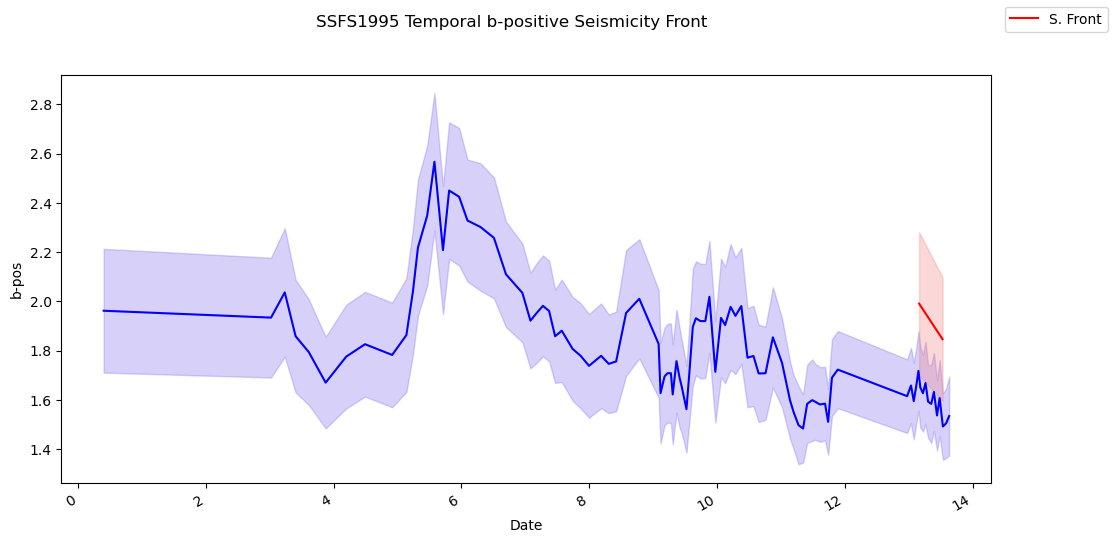

In [19]:
fig, ax1 = plt.subplots(figsize=(12,6))
fig.suptitle("SSFS1995 Temporal b-positive Seismicity Front")
ax1.plot(rdtr,rbp,color="blue")
ax1.fill_between(rdtr, np.subtract(rbp,rstdp), np.add(rbp,rstdp), alpha = 0.3, color = 'mediumslateblue')
ax1.plot(pdtr,pbp,color="red", label='S. Front')
ax1.fill_between(pdtr, np.subtract(pbp,pstdp), np.add(pbp,pstdp), alpha = 0.3, color = 'lightcoral')
#ax1.set_xlim([2,20])
#ax1.set_ylim([1,2])
fig.autofmt_xdate()
ax1.set_ylabel('b-pos')
ax1.set_xlabel('Date')
fig.autofmt_xdate()
fig.legend(loc = 'upper right')
plt.show()

182430


In [20]:
rstM1 = np.array(rstM)
b, Mc, hist = b_value_functions.btrad(rstM1, bins, delta_b = 0.01)
hist1, bP = b_value_functions.bpos(rstM1)
low_b, high_b, std = b_value_functions.bootstrap(rstM1, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.01)    
low_bp, high_bp, stdp = b_value_functions.bootstrap(rstM1, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.01)
print(b,low_b,high_b, std)
print(bP,low_bp,high_bp, stdp)

1.8131008867052547 1.7036014117832996 1.9387210350372577 0.05955086770773406
1.7797812973915048 1.6712371069092318 1.906636089778509 0.06117967465393205


1.8131008867052547 1.7036014117832996 1.9387210350372577 0.05955086770773406
1.7797812973915048 1.6712371069092318 1.906636089778509 0.06117967465393205

In [21]:
percM1 = np.array(percM)
b, Mc, hist = b_value_functions.btrad(percM1, bins, delta_b = 0.01)
hist1, bP = b_value_functions.bpos(percM1)
low_b, high_b, std = b_value_functions.bootstrap(percM1, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.01)    
low_bp, high_bp, stdp = b_value_functions.bootstrap(percM1, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.01)
print(b,low_b,high_b, std)
print(bP,low_bp,high_bp, stdp)

1.8494801914872303 1.5343440668981085 2.1961877607926854 0.1762747405854342
1.825865394373801 1.4486704242492918 2.3736157271628704 0.2425660069192386


1.8494801914872303 1.5343440668981085 2.1961877607926854 0.1762747405854342
1.825865394373801 1.4486704242492918 2.3736157271628704 0.2425660069192386

In [50]:

"""
90% bv
rst 1.9543381628343397 1.8843700548932016 2.140347267701394 0.06463986506176508
perc 2.130618320363664 1.796995819133982 2.6690467272496523 0.21979333438082782
bp
rst 2.018378673054412 1.8869523910909738 2.1667832424116926 0.06997504532672108
perc 2.042046901664297 1.6405619552511574 2.644759701818819 0.26178493229519256
80% bv
rst 1.9283489122239352 1.8430831986298868 2.1548217519696844 0.07935516431531507
perc 2.133158399429428 1.9195014693082058 2.4630965063193746 0.13924618679620154
bp 
rst 2.047509758031598 1.9124373414659646 2.1815549655810833 0.07263768521466958
perc 2.066061127500907 1.799415923269216 2.4202086259994644 0.15828531588390582
"""

#Newww
"""
90% bv
rst 1.809750808481159 1.6950939262749658 1.9298293353292046 0.06023924619986184
perc 1.8777401935285922 1.551762647962186 2.3103570600011425 0.19042508093106744
bp
rst 1.7884480059941705 1.6785561881822317 1.912941145905314 0.058603753460593246
perc 1.7844459172430895 1.4214871306920203 2.3303690550872025 0.2334593580081409
80% bv
rst 1.9283489122239352 1.8430831986298868 2.1548217519696844 0.07935516431531507
perc 2.133158399429428 1.9195014693082058 2.4630965063193746 0.13924618679620154
bp 
rst 2.047509758031598 1.9124373414659646 2.1815549655810833 0.07263768521466958
perc 2.066061127500907 1.799415923269216 2.4202086259994644 0.15828531588390582
"""

Me


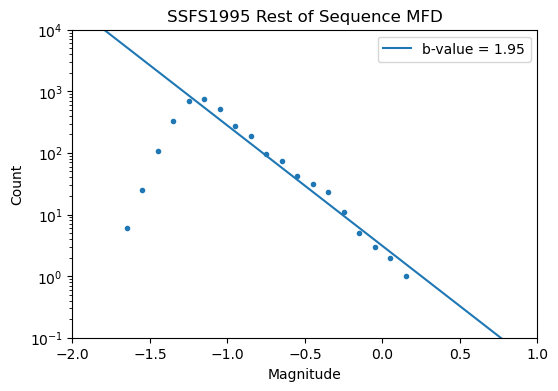

In [49]:
bins = np.arange(-2, 6, 0.1)
b, Mc, hist = b_value_functions.btrad(rstM1, bins, delta_b = 0.01)
x = bins
y_Mc = hist[0][np.argmax(hist[0])+2]
a = np.log10(y_Mc) + b*Mc

best_fit = 10**(a-b*x)

mid_bins = (bins[:-1] + bins[1:])/2

# Plot results 
figure = plt.figure(figsize = [6,4])
ax1 = figure.add_subplot(111)

ax1.scatter(mid_bins, hist[0], marker = '.')
ax1.plot(x, best_fit, label = 'b-value = '+str(np.round(b,2)))

ax1.set_xlim([-2, 1])
ax1.set_ylim([10**-1, 10**4])

ax1.set_yscale('log')
ax1.legend(loc = 'upper right')

ax1.set_xlabel('Magnitude')
ax1.set_ylabel('Count')
ax1.set_title('SSFS1995 Rest of Sequence MFD')
plt.show()

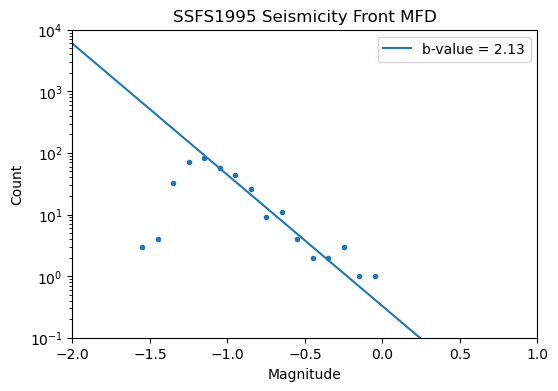

In [50]:
bins = np.arange(-2, 6, 0.1)
b, Mc, hist = b_value_functions.btrad(percM1, bins, delta_b = 0.01)
x = bins
y_Mc = hist[0][np.argmax(hist[0])+2]
a = np.log10(y_Mc) + b*Mc

best_fit = 10**(a-b*x)

mid_bins = (bins[:-1] + bins[1:])/2

# Plot results 
figure = plt.figure(figsize = [6,4])
ax1 = figure.add_subplot(111)

ax1.scatter(mid_bins, hist[0], marker = '.')
ax1.plot(x, best_fit, label = 'b-value = '+str(np.round(b,2)))

ax1.set_xlim([-2, 1])
ax1.set_ylim([10**-1, 10**4])

ax1.set_yscale('log')
ax1.legend(loc = 'upper right')

ax1.set_xlabel('Magnitude')
ax1.set_ylabel('Count')
ax1.set_title('SSFS1995 Seismicity Front MFD')
plt.show()